# Exercise Sheet 02: Principal Component Analysis, Factor Analysis, K-Means, and Gaussian Mixture Models

**Introduction to Data Mining WS23/24**  
**Bielefeld University**  
**Alina Deriyeva, Benjamin Paaßen**  
**Exercise Sheet Publication Date: 2023-11-06**  
**Exercise Sheet Submission Deadline: Friday, 2023-11-17, noon (i.e. 12:00), via Moodle.**

**NOTE** The use of language models/AI tools is permitted IF you notify us of the use (just indicate it in the respective task) and are still able to understand and present your results. We also appreciate it if you link to a chatlog of the interaction with the language model/AI tool so that we can understand better how students tend to use these tools.

Edward Lang, Niklas Nebeling

## Preamble: Data set

The file `sheet02_data.csv` contains fictional data as you might find in an online course. Each row represents a student, each column a feature of the student's activity in the course, namely their number of posts in the course discussion forum, the number of questions they asked in chat during the online lectures, the number of messages they sent to their peers, and the number of points they achieved in each of the five exercises of the course.

Note that there is quite a bit of missing data for later exercises because many students dropped out of the course early.

The following line loads this raw data and prints it.

In [78]:
import numpy as np
import matplotlib.pyplot as plt

features = ['num_forum_postings',
    'num_questions',
    'num_messages',
    'num_completed_tasks',
    'points_exercise_1',
    'points_exercise_2',
    'points_exercise_3',
    'points_exercise_4',
    'points_exercise_5']

X = np.loadtxt('sheet02_data.csv', skiprows = 1, delimiter = '\t')
print(X)

[[ 3.  1.  1. ... 56. 61. 60.]
 [ 0.  0.  0. ... nan nan nan]
 [ 7.  3.  2. ... 66. 57. nan]
 ...
 [ 0.  0.  0. ... 30. nan nan]
 [ 1.  0.  0. ... nan nan nan]
 [ 3.  0.  1. ... 40. 35. 40.]]


### Task 02.01

Our first challenge is to impute the missing data. Fill in missing values with the mean points the respective student got on the other exercises. For students with no completed exercises, fill in zeros.

In [79]:
mean_exc_points = np.mean(X[:, 4:9], axis=1)
missing = np.isnan(X[:, 4:9])

# Fill missing values with the mean
X[:, 4:9] = np.where(missing, mean_exc_points[:, None], X[:, 4:9])
# Fill zeros for students with no completed excercises
X[:, 4:9][np.isnan(X[:, 4:9])] = 0
print(X)

[[ 3.  1.  1. ... 56. 61. 60.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 7.  3.  2. ... 66. 57.  0.]
 ...
 [ 0.  0.  0. ... 30.  0.  0.]
 [ 1.  0.  0. ...  0.  0.  0.]
 [ 3.  0.  1. ... 40. 35. 40.]]


### Task 02.02

Next, normalize the data by dividing by the maximum value in each column.

In [80]:
max_val = np.max(X, axis=0)
X = X / max_val
print(X)

[[0.25       0.2        0.11111111 ... 0.70886076 0.7721519  0.76923077]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.58333333 0.6        0.22222222 ... 0.83544304 0.72151899 0.        ]
 ...
 [0.         0.         0.         ... 0.37974684 0.         0.        ]
 [0.08333333 0.         0.         ... 0.         0.         0.        ]
 [0.25       0.         0.11111111 ... 0.50632911 0.44303797 0.51282051]]


## Principal Component Analysis

### Task 02.03

Compute the covariance matrix of the data via `np.cov` and compute the eigenvalues of the covariance matrix via `np.linalg.eigvals`. Provide a plot of the eigenvalues on the y-axis, sorted according to size (the largest eigenvalue at x=1, the second-largest on x=2, and so on).

Compute and report the percentage of variance covered by the first two eigenvalues.

**HINT:** `np.cov` treats the rows as variables and columns as observations. For our data set, rows are observations and columns are variables.

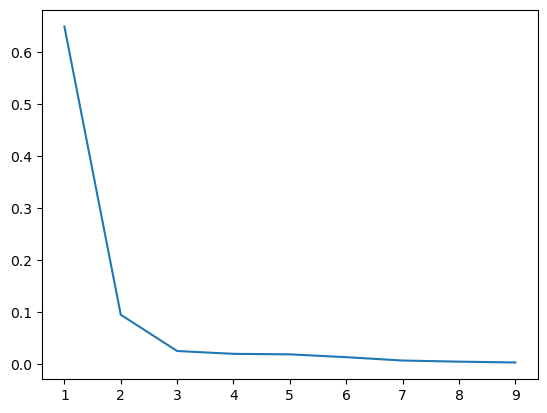

Variance covered by the first two eigenvalues:  89.42095141236194 %


In [81]:
# Sorted eigenvalue plot
cov_matrix = np.cov(X, rowvar=False)
eigen_val = np.sort(np.linalg.eigvals(cov_matrix))[::-1]
plt.plot(np.arange(1, len(eigen_val)+1), eigen_val)
plt.show()

# Percentage of variance covered by the first two eigenvalues
variance = np.sum(eigen_val[:2]) / np.sum(eigen_val) * 100
print("Variance covered by the first two eigenvalues: ", variance, "%")

### Task 02.04

Use the `fit` method of a `sklearn.decomposition.PCA` model to perform a principal component analysis of this data with `n_components = 2`.

Transform the data to the latent space via the `transform` function of the PCA model.

Plot the data using a 2D scatter plot.

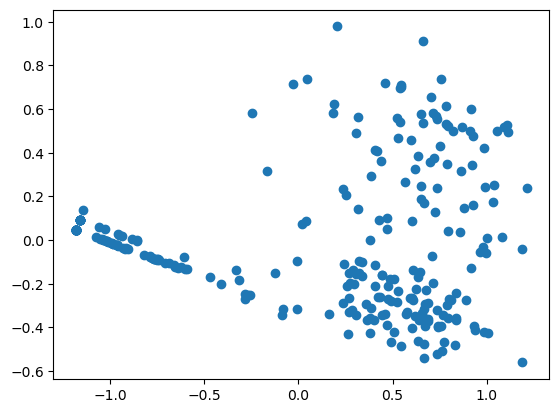

In [82]:
from sklearn.decomposition import PCA

# PCA fit and transform
pca_model = PCA(n_components=2)
pca_model.fit(X)
pca_model_tr = pca_model.transform(X)
# Scatter plot
plt.scatter(pca_model_tr[:, 0], pca_model_tr[:, 1])
plt.show()

### Task 02.05 (Bonus Task)

Compute the eigenvalue decomposition of the covariance matrix and perform PCA yourself. Only retain the two most prominent components and plot the transformed data with a 2D scatter plot. Check whether your plot is consistent with the plot above.

## Factor Analysis

### Task 02.06

Use the `fit` method of a `sklearn.decomposition.FactorAnalysis` model to perform a factor analysis of this data with `n_components = 2`. Use the `rotation = 'varimax'` parameter.

Transform the data to the latent space via the `transform` function of the FA model.

Plot the data using a 2D scatter plot.

Compare this plot to the plot above. What difference do you notice?

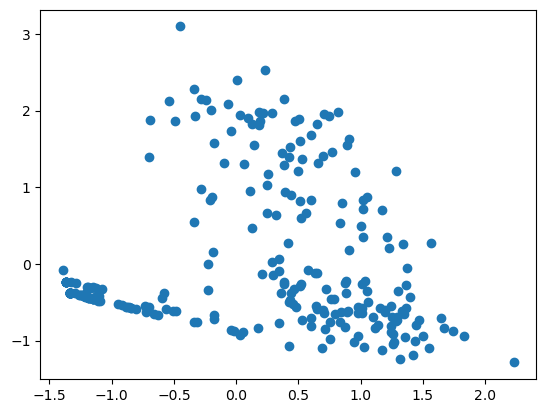

In [83]:
from sklearn.decomposition import FactorAnalysis
# FA Model
fa_model = FactorAnalysis(n_components=2, rotation="varimax")
fa_model.fit(X)
fa_model_tr = fa_model.transform(X)
plt.scatter(fa_model_tr[:, 0], fa_model_tr[:, 1])
plt.show()

YOUR ANSWER HERE

### Task 02.07

Print the `components_` property of the factor analysis model. For both factors, report which features/columns of the data have high weights.

Try to interpret the 

Print the factors found by the factor analysis using `print(model.components_)`. Try to interpret both factors. What does the first factor represent? What does the second factor represent?

In [84]:
print("FA Model components:\n", fa_model.components_)

# Weights
f1_w = fa_model.components_[0]
f2_w = fa_model.components_[1]

# High weights
f1_w_h = np.argsort(np.abs(f1_w))[::-1][:3]
f2_w_h = np.argsort(np.abs(f2_w))[::-1][:3]
print("___________________________________________________________")
# Print feature relevance
print("Feature Factor 1 :")
for idx in f1_w_h:
    print(f"{features[idx]}: {f1_w[idx]}")  
print("___________________________________________________________")    
print("Feature Factor 2 :")  
for idx in f2_w_h:
    print(f"{features[idx]}: {f2_w[idx]}")

FA Model components:
 [[0.12394814 0.09441533 0.09611795 0.35531362 0.26373618 0.29135977
  0.29088736 0.29739746 0.29325212]
 [0.21135288 0.19175507 0.18018098 0.091416   0.05275324 0.0615744
  0.06737594 0.05038413 0.03650829]]
___________________________________________________________
Feature Factor 1 :
num_completed_tasks: 0.35531362094902663
points_exercise_4: 0.2973974648487442
points_exercise_5: 0.29325212316575666
___________________________________________________________
Feature Factor 2 :
num_forum_postings: 0.21135288056692472
num_questions: 0.19175506854950247
num_messages: 0.18018097969466995


#### Answer

The first factor represents relevance in the amount of completed tasks, which includes the scores of the last excersises.
The second factor represents relevance in the participation on the forum.

## Clustering

### Task 02.08

Using `sklearn.cluster.KMeans`, perform cluster analyses of the data for `n_clusters` between 2 and 10. For each value of `n_clusters`, compute the `sklearn.metrics.silhouette_score`. Provide a plot of the silhouette score on the y axis and `n_clusters` on the x axis. Report which value for `n_clusters` is best according to this analysis.

**HINT:** The `silhouette_score` function requires the cluster labels as second argument. You can retrieve the cluster labels from a fitted `KMeans` model via the `predict` function.

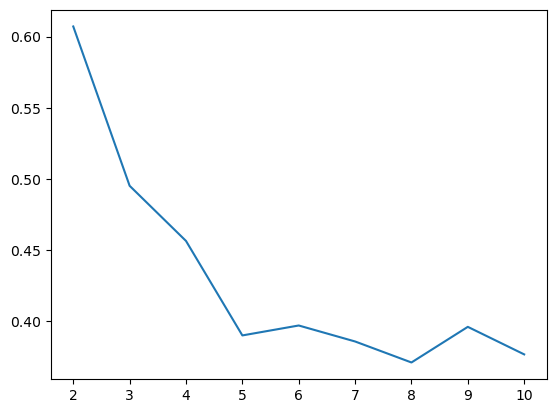

Best value for n_clusters:  2


In [85]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore")

# calculate scores
scores = []
for clusters in range(2, 11):
    # set state so the results arent different, when rerunning the file
    kmeans_cluster = KMeans(n_clusters=clusters, random_state=33)
    kmeans_cluster.fit(X)
    silh_score = silhouette_score(X, kmeans_cluster.predict(X))
    scores.append(silh_score)
    
# plot
plt.plot(range(2, 11), scores)
plt.show()

# Retrieve best value for n_clusters
clusters_r = range(2, 11)
print("Best value for n_clusters: ", clusters_r[np.argmax(scores)])

### Task 02.09

Using `sklearn.cluster.KMeans`, perform a cluster analysis of the data with `n_clusters = 2`. Provide a scatter plot of the latent representation of the data according to factor analysis, where the color of each point represents the cluster membership.

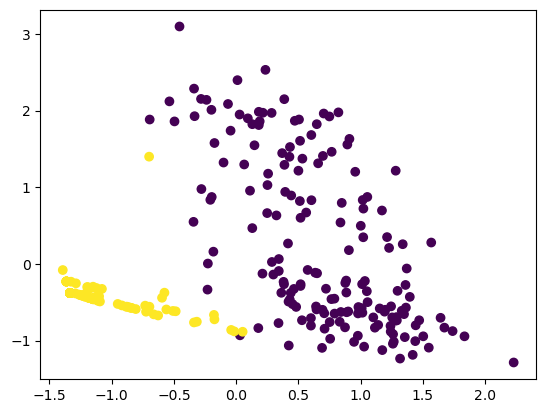

In [86]:
# Factor analysis for latent representation
fa_model = FactorAnalysis(n_components=2, rotation="varimax")
fa_model.fit(X)
fa_model = fa_model.transform(X)

# KMeans clustering
kmeans_cluster = KMeans(n_clusters=2, random_state=33)
kmeans_cluster.fit(X)
cluster_l = kmeans_cluster.predict(X)

# Plot
plt.scatter(fa_model[:, 0], fa_model[:, 1], c=cluster_l)
plt.show()

### Task 02.10 (bonus task)

Repeat the cluster analysis, but perform it on the latent representation according to factor analysis. Plot the new clustering. Check if it is consistent with the plot above.


### Task 02.11 (bonus task)

Implement $K$-Means yourself. Check if your result is consistent with the result provided by the `sklearn` implementation.


## Gaussian Mixture Models

### Task 02.12

Using `sklearn.mixture.GaussianMixture`, perform cluster analyses of the data with `n_components` between 2 and 10. For each cluster analysis, compute the `bic` function value of the model (this is the Bayesian information criterion). Provide a plot of the bic value on the y axis with `n_components` on the x axis.

Report which value for `n_components` is best according to this analysis.

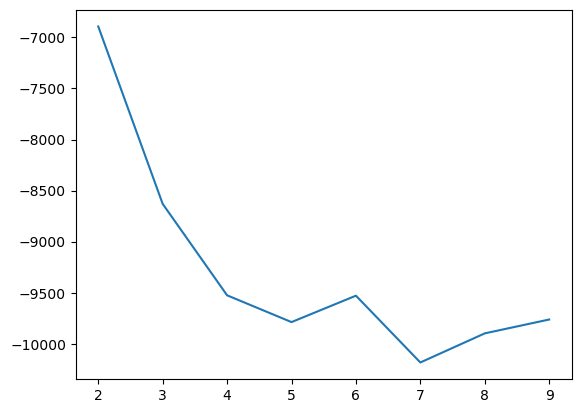

The best value for n_components is 7


In [87]:
from sklearn.mixture import GaussianMixture

bic_scores = []
for comp in range(2, 10):
    gauss_m = GaussianMixture(n_components=comp, random_state=33)
    gauss_m.fit(X)
    bic_scores.append(gauss_m.bic(X))
    
plt.plot(range(2, 10), bic_scores)    
plt.show()

print(f"The best value for n_components is {range(2, 10)[np.argmin(bic_scores)]}")

### Task 02.13

Using `sklearn.mixture.GaussianMixture`, perform a cluster analysis of the data with `n_components = 2`. Provide a scatter plot of the latent representation of the data according to factor analysis, where the color of each point represents the cluster membership.

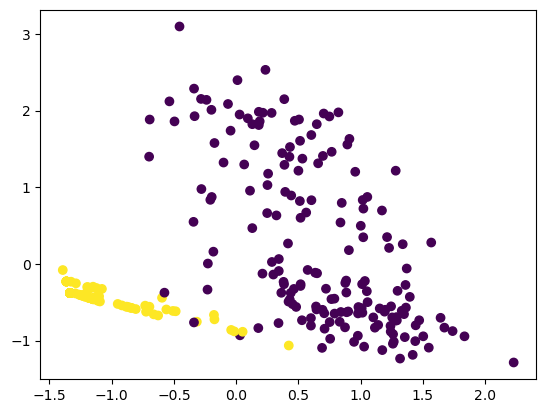

In [88]:
gauss_m = GaussianMixture(n_components=2, random_state=33)
gauss_m.fit(X)
labels = gauss_m.predict(X)

plt.scatter(fa_model[:, 0], fa_model[:, 1], c=labels)
plt.show()

### Task 02.14

Using `sklearn.mixture.GaussianMixture`, perform a cluster analysis of the latent space representation according to factor analysis with `n_components = 3`. Provide a scatter plot, where the color of each point represents the cluster membership.

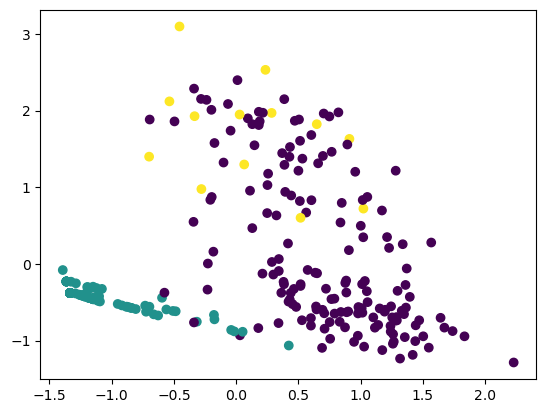

In [89]:
gauss_m_three = GaussianMixture(n_components=3, random_state=33)
gauss_m_three.fit(X)
labels_three = gauss_m_three.predict(X)

plt.scatter(fa_model[:, 0], fa_model[:, 1], c=labels_three)
plt.show()

### Task 02.15

Print the mean feature values for each cluster. Try to interpret the clusters: What are the mean differences between the clusters? How would you name each cluster?

In [90]:
d_clusters = np.column_stack((X, labels_three))
u_clusters = np.unique(labels_three)

for cluster in u_clusters:
    cl_data = d_clusters[d_clusters[:, -1] == cluster, :-1]
    mean_val = np.mean(cl_data, axis=0)
    print(f"\nMean feature values for cluster: {cluster}:\n")
    print("__________________________________________________")
    for idx, mean in enumerate(mean_val):
        print(f"Feature {features[idx]}: {mean}")
    print("__________________________________________________")    


Mean feature values for cluster: 0:

__________________________________________________
Feature num_forum_postings: 0.37424242424242404
Feature num_questions: 0.27757575757575753
Feature num_messages: 0.28754208754208754
Feature num_completed_tasks: 1.0
Feature points_exercise_1: 0.6377373737373738
Feature points_exercise_2: 0.6357171717171713
Feature points_exercise_3: 0.6065976217874952
Feature points_exercise_4: 0.6052934407364785
Feature points_exercise_5: 0.620668220668221
__________________________________________________

Mean feature values for cluster: 1:

__________________________________________________
Feature num_forum_postings: 0.017295597484276722
Feature num_questions: 0.0
Feature num_messages: 0.0
Feature num_completed_tasks: 0.21509433962264146
Feature points_exercise_1: 0.14943396226415093
Feature points_exercise_2: 0.08251572327044022
Feature points_exercise_3: 0.03773584905660377
Feature points_exercise_4: 0.022450441843802245
Feature points_exercise_5: 0.0
_____

Cluster 0: Contains students that achieved high scores, but didnt necessarily participated on the forum. \
Cluster 1: Contains students that had low scores and didnt participate on the forum. \
Cluster 2: Contains students that participated on the forum, but had a mid level score overall.

### Task 02.16

Recall the equation for the expected negative log likelihood in a Gaussian mixture model from the lecture:

\begin{align*}
Q = &\sum_{i=1}^N \sum_{k=1}^K -\gamma_{k,i} \log\Big[ p_{X|Z}(x_i|k) \cdot p_Z(k) \Big]\\
=& \sum_{i=1}^N \sum_{k=1}^K \gamma_{k,i} \Big(\frac{1}{2}\log[2\pi \det(\Sigma_k)] + \frac{1}{2} (x_i - \mu_k)^T \Sigma_k^{-1} (x_i - \mu_k) - \log[p_Z(k)]\Big)
\end{align*}

Assuming that $Q$ is convex, find the optimal values for $\mu_k$ and $\Sigma_k$

**HINT:** You may use the following general matrix/vector gradient equations (refer to the [matrix cook book by Peterson and Pedersen (2012), p.10-11](https://www.math.uwaterloo.ca/~hwolkowi/matrixcookbook.pdf) :
\begin{align*}
\nabla_x (x - y)^T W (x - y) &= 2 W (x-y) \\
\nabla_W (x - y)^T W (x - y) &= (x-y)(x-y)^T \\
\nabla_{W^{-1}} \log[\det(W)] &= -W & \text{if $W$ is symmetric and positive semi-definite}
\end{align*}

YOUR ANSWER HERE